In [2]:
import pandas as pd
import seaborn as sns
import math
from treelib import Tree, Node

In [2]:

def sum_per_step(df,state):
    steps = []
    sum = []
    for step in df["step"].unique():
        steps.append(step)
        sum.append(len(df[(df.step==step) & (df.state == state) ]))
    return steps,sum

def draw_exp(df,state):
    sums= []
    steps=[]
    print(df.exp.unique())
    for exp in df.exp.unique():
        step, sum = sum_per_step(df[df.exp==exp],state)
        sums.extend(sum)
        steps.extend(step)


    d = {'step': steps, 'nb_state': sums}

    df = pd.DataFrame(data=d)   
    return df



In [3]:
def draw_tree_graph(df):
    tree = Tree()
    df = df.reset_index()  # make sure indexes pair with number of rows
    df.drop_duplicates()
    tree.create_node("Root","r"+str(-1))
    nodes = []
    for index, row in df.iterrows():
        node = "r"+str(row["infected"])
        if node not in nodes:
            tree.create_node("Robot "+str(row["infected"]),node,parent="r"+str(row["infector"]))
            nodes.append(node)
    tree.show()
    

# Experience 1 : 3 tests
- déplacement cluster
- proba infection 5%
- proba barrier 25%

['test']


<AxesSubplot: xlabel='step', ylabel='nb_state'>

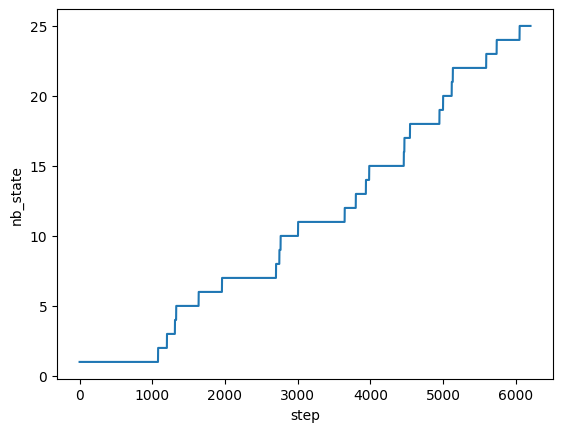

In [6]:

data1 = pd.read_csv("EXP1/data.csv",delimiter=";")       

df = draw_exp(data1,"infected")


sns.lineplot(df,x='step',y='nb_state')


In [7]:
data1_tree = pd.read_csv("EXP1/epidemic_tree_random.csv",delimiter=";")   
draw_tree_graph(data1_tree[data1_tree.exp == "test2"])

FileNotFoundError: [Errno 2] No such file or directory: 'EXP1/epidemic_tree_random.csv'